In [61]:
# Creating environment and importing necessary libraries

import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [42]:
# Importing dataset
data = pd.read_csv("AmesHousing.tsv",delimiter='\t')

In [43]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [44]:
data.shape

(2930, 82)

In [45]:
def transform_features(df):
    return df

In [46]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [47]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    lr = LinearRegression()
    numerical_train = train.select_dtypes(include=['int','float'])
    numerical_test = test.select_dtypes(include=['int','float'])
    features = numerical_train.columns.drop('SalePrice')
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'],predictions))
    return rmse

In [48]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
print(rmse)

57088.25161263909


## Feature Engineering

### Handling missing values

In [32]:
## firstly, let's handle all columns(not by data-types)
#Drop any row with 5% or more missing values for now.

In [33]:
all_col_missing = data.isnull().sum()
all_col_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [34]:
# Filtering columns to drop
drop_missing_values = all_col_missing[all_col_missing > len(data)/100].sort_values()

In [35]:
# Drop those columns from the data frame.
data = data.drop(drop_missing_values.index,axis=1)

In [36]:
# Let's drop the columns having text entries
# Drop any with 1 or more missing values for now
text_col = data.select_dtypes(include=['object'])
text_col_missing = text_col.isnull().sum()
drop_missing_values_2 = text_col_missing[text_col_missing > 0]
data = data.drop(drop_missing_values_2.index, axis=1)

In [37]:
# Now handling missing values of numerical columns
# by replacing missing value to most common value(by mode)

numerical_col = data.select_dtypes(include=['int','float'])
numerical_missing = numerical_col.isnull().sum()
fixable_num_col = numerical_missing[(numerical_missing < len(data)/20) & (numerical_missing > 0)]
fixable_num_col

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [38]:
replacement_values = data[fixable_num_col.index].mode().to_dict(orient='records')[0]

In [39]:
data = data.fillna(replacement_values)

In [40]:
data.isnull().sum().value_counts()

0    64
dtype: int64

#### What new features can we create, that better capture the information in some of the features?

In [18]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [19]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [20]:

## Create new columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
data = data.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:

that aren't useful for ML    
leak data about the final sale

In [21]:
## Drop columns that aren't useful for ML
data = data.drop(['PID', 'Order'],axis=1)

## Drop columns that leak info about the final sale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)


In [22]:
data.shape

(2927, 58)

Let's update transform features function

In [49]:
def transform_features(data):
    ## firstly, let's handle all columns(not by data-types)
    #Drop any row with 5% or more missing values for now.
    
    all_col_missing = data.isnull().sum()
    
    # Filtering columns to drop
    drop_missing_values = all_col_missing[all_col_missing > len(data)/100].sort_values()
    
    # Drop those columns from the data frame.
    data = data.drop(drop_missing_values.index,axis=1)
    
    # Let's drop the columns having text entries
    # Drop any with 1 or more missing values for now
    text_col = data.select_dtypes(include=['object'])
    text_col_missing = text_col.isnull().sum()
    drop_missing_values_2 = text_col_missing[text_col_missing > 0]
    data = data.drop(drop_missing_values_2.index, axis=1)
    
    # Now handling missing values of numerical columns
    # by replacing missing value to most common value(by mode)
    
    numerical_col = data.select_dtypes(include=['int','float'])
    numerical_missing = numerical_col.isnull().sum()
    fixable_num_col = numerical_missing[(numerical_missing < len(data)/20) & (numerical_missing > 0)]
    
    replacement_values = data[fixable_num_col.index].mode().to_dict(orient='records')[0]
    data = data.fillna(replacement_values)
    data.isnull().sum().value_counts()
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0]
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    
    
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    
    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)
    
    ## No longer need original year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    ## Drop columns that aren't useful for ML
    data = data.drop(['PID', 'Order'],axis=1)
    
    ## Drop columns that leak info about the final sale
    data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return data
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]
    
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    lr = LinearRegression()
    numerical_train = train.select_dtypes(include=['int','float'])
    numerical_test = test.select_dtypes(include=['int','float'])
    features = numerical_train.columns.drop('SalePrice')
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'],predictions))
    return rmse

tranform_data = transform_features(data)
selected_data = select_features(tranform_data)
rmse = train_and_test(selected_data)

In [50]:
rmse

55275.36731241307

#### Before feature engineering rmse value was 57088.25
#### After feature engineering rmse value reduce to 55275.36

### Feature Selection

In [51]:
numerical_data = tranform_data.select_dtypes(include=['int','float'])

In [52]:
numerical_data.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


In [54]:
abs_corr_coef = numerical_data.corr()['SalePrice'].abs().sort_values()
abs_corr_coef

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

In [55]:
# Let's only keep columns with a correlation coefficient of 
# larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coef[abs_corr_coef > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [56]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_data = tranform_data.drop(abs_corr_coef[abs_corr_coef < 0.4].index, axis=1)

In [57]:
transform_data

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13,12
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,602.0,926.0,GasA,Ex,Y,926,1604,2,Gd,7,Typ,1,2.0,470.0,Y,195500,12,12
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,616.0,1338.0,GasA,Ex,Y,1338,1338,2,Gd,6,Typ,0,2.0,582.0,Y,213500,9,9
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,263.0,1280.0,GasA,Ex,Y,1280,1280,2,Gd,5,Typ,0,2.0,506.0,Y,191500,18,18
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,1180.0,1595.0,GasA,Ex,Y,1616,1616,2,Gd,5,Typ,1,2.0,608.0,Y,236500,15,14
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0.0,994.0,GasA,Gd,Y,1028,1804,2,Gd,7,Typ,1,2.0,442.0,Y,189000,11,11


In [59]:
transform_data_corr = tranform_data.corr()

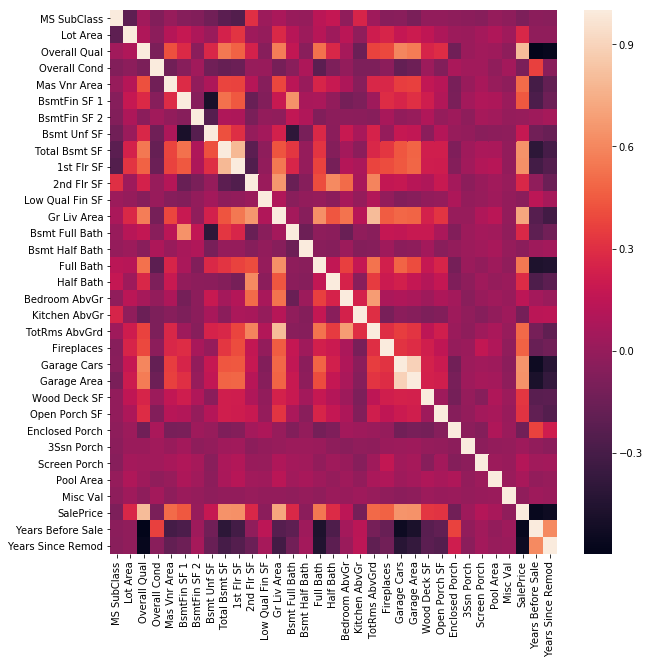

In [63]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(transform_data_corr,ax=ax)


Which categorical columns should we keep?

In [64]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [65]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)


In [68]:
transform_cat_cols

['PID',
 'MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [66]:
## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

In [70]:
uniqueness_counts

Street               2
Alley                2
Central Air          2
Land Contour         4
Misc Feature         5
Lot Config           5
Bldg Type            5
Mas Vnr Type         5
Sale Condition       6
Garage Type          6
Heating              6
Foundation           6
Roof Style           6
MS Zoning            7
House Style          8
Roof Matl            8
Condition 2          8
Condition 1          9
Sale Type           10
MS SubClass         16
Exterior 1st        16
Exterior 2nd        17
Neighborhood        28
PID               2930
dtype: int64

In [71]:
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [72]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)